# Globalized Newton Method

In [13]:
import numpy as np
from IPython.display import display, Image, HTML

display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

## Algorithm

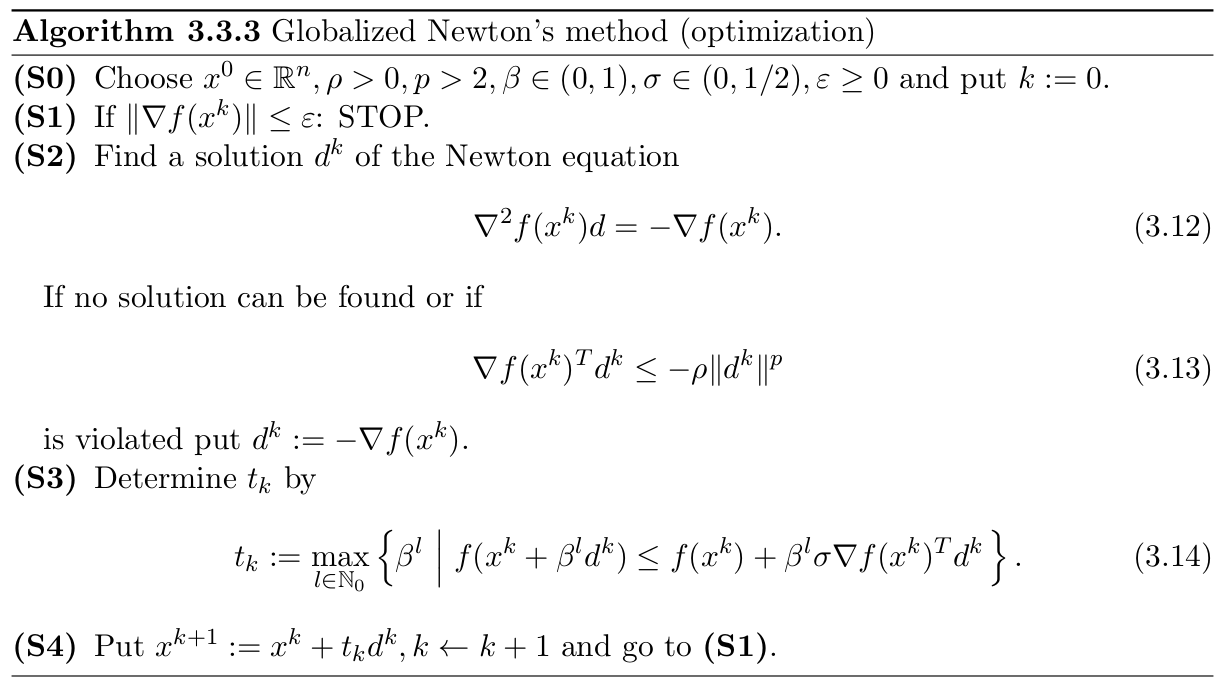

In [14]:
Image(filename='globalized_newton_method.png')

## Step Size: Armijo Rule
- We want to combine the search direction $d^k = - \nabla f(x^k)$ with step-size $t_k$
- The Armijo rule is supposed to ensure a sufficient decrease of the objective function

In [2]:
def step_size(self, beta, sigma, x, d, func):
    """
    Armijo's Rule
    """
    i = 0
    inequality_satisfied = True
    while inequality_satisfied:
        if func.eval(x + np.power(beta, i) * d) <= func.eval(x) + np.power(beta, i) * sigma * func.gradient(x).dot(
                d):
            break

        i += 1

    return np.power(beta, i)

## Rosenbrock Function
- Introduced by Howard H. Rosenbrock in 1960, used as a performance test problem for optimization problems.
- The Rosenbrock function $r: \mathbb{R}^2 \rightarrow \mathbb{R}$ is given by:
$$r(x) = 100 (x_2 - x_1^2)^2+ (1 - x_1)^2$$

In [3]:
import numpy as np
from src.function import Function

class Rosenbrock(Function):

    def eval(self, x):
        assert len(x) == 2, '2 dimensional input only.'
        return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2

    def gradient(self, x):
        assert len(x) == 2, '2 dimensional input only.'
        return np.array([
            2 * (-200 * x[0] * x[1] + 200 * np.power(x[0], 3) - 1 + x[0]),
            200 * (x[1] - x[0] ** 2)
        ])

    def hessian(self, x):
        assert len(x) == 2, '2 dimensional input only.'
        df_dx1 = -400 * x[1] + 1200 * x[0] ** 2 + 2
        df_dx1dx2 = -400 * x[0]
        df_dx2dx1 = -400 * x[0]
        df_dx2 = 200

        return np.array([[df_dx1, df_dx1dx2], [df_dx2dx1, df_dx2]])

## Example
- The parameters will be the following:
$$\beta := 0.5, \sigma := 10^{-4}, \varepsilon := 10^{-4}$$
- Start point will be the following:
$$x^0 := (-1.2, 1)$$

In [5]:
from src.optimizers.newton_method import NewtonMethod

starting_point = np.array([1.2, 1])
rho = 1e-8
p = 2.1
k_max = 200
beta = 0.5
sigma = 1e-4
epsilon = 1e-6
objective = Rosenbrock()

optimizer = NewtonMethod()

x = optimizer.optimize(x_0=starting_point,
                       rho=rho,
                       p=p,
                       k_max=k_max,
                       beta=beta,
                       sigma=sigma,
                       epsilon=epsilon,
                       func=objective)

print(f'Optimal Point: {x}')
print(f'Iterations: {optimizer.iterations}')

Optimal Point: None
Iterations: 8
